In [1]:
pwd()

"/Users/younghokim/astro/prj4_eht"

In [2]:
using Comrade
using Plots

In [4]:
using Pyehtim

In [49]:
using StableRNGs
rng = StableRNG(42)

StableRNGs.LehmerRNG(state=0x00000000000000000000000000000055)

In [5]:
readdir()

25-element Vector{String}:
 ".DS_Store"
 ".ipynb_checkpoints"
 ".virtual_documents"
 "Akiyama_2019_ApJL_875_L6.pdf"
 "Comrade.jl"
 "EHTC_FirstM87Results_Apr2019"
 "EHTC_FirstM87Results_Apr2019_uvfits.tgz"
 "Julia_comrade.ipynb"
 "SR1_M87_2017_096_lo_hops_netcal_StokesI.uvfits"
 "achael_imaging_workshop_2016.pdf"
 "eht-imaging"
 "ehtim_tutorial_orig.ipynb"
 "ehtim_tutorial_try.ipynb"
 "ehtim_tutorial_try_multiprocess.ipynb"
 "jason_mad_eofn.txt"
 "results"
 "results.fits"
 "results.png"
 "results.uvfits"
 "results_logscale.png"
 "resultsamps.pdf"
 "resultsuv.pdf"
 "space_vlbi_tutorial_orig.ipynb"
 "space_vlbi_tutorial_try.ipynb"
 "tutorial1_data.uvfits"

In [6]:
obseht = ehtim.obsdata.load_uvfits("comrade_data/SR1_M87_2017_096_lo_hops_netcal_StokesI.uvfits")

Python: <ehtim.obsdata.Obsdata object at 0x2898a5fc0>

In [7]:
obs = Pyehtim.scan_average(obseht)

[ Info: Before homogenizing we have 25 unique times
[ Info: After homogenizing we have 25 unique times


Python: <ehtim.obsdata.Obsdata object at 0x2898bfe50>

In [8]:
vis = extract_table(obs, ComplexVisibilities())

/Users/younghokim/.julia/environments/v1.9/.CondaPkg/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


EHTObservation{Float64,Comrade.EHTVisibilityDatum{Float64}, ...}
  source: M87
  mjd: 57849
  frequency: 2.27070703125e11
  bandwidth: 1.856e9
  stations: [:AA, :AP, :AZ, :JC, :LM, :PV, :SM]
  nsamples: 274


In [10]:
amp = extract_table(obs, VisibilityAmplitudes())

EHTObservation{Float64,Comrade.EHTVisibilityAmplitudeDatum{Float64}, ...}
  source: M87
  mjd: 57849
  frequency: 2.27070703125e11
  bandwidth: 1.856e9
  stations: [:AA, :AP, :AZ, :JC, :LM, :PV, :SM]
  nsamples: 274


In [11]:
cphase = extract_table(obs, ClosurePhases(; snrcut = 3.0))

/Users/younghokim/.julia/environments/v1.9/.CondaPkg/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/younghokim/.julia/environments/v1.9/.CondaPkg/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


EHTObservation{Float64,Comrade.EHTClosurePhaseDatum{Float64}, ...}
  source: M87
  mjd: 57849
  frequency: 2.27070703125e11
  bandwidth: 1.856e9
  stations: [:AA, :AP, :AZ, :JC, :LM, :PV, :SM]
  nsamples: 153


In [13]:
lcamp = extract_table(obs, LogClosureAmplitudes(; snrcut = 3.0))

/Users/younghokim/.julia/environments/v1.9/.CondaPkg/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


EHTObservation{Float64,Comrade.EHTLogClosureAmplitudeDatum{Float64}, ...}
  source: M87
  mjd: 57849
  frequency: 2.27070703125e11
  bandwidth: 1.856e9
  stations: [:AA, :AP, :AZ, :JC, :LM, :PV, :SM]
  nsamples: 129


In [27]:
obseht = Pyehtim.load_uvfits_and_array("./comrade_data/polarized_gaussian_all_corruptions.uvfits")

Python: <ehtim.obsdata.Obsdata object at 0x2c42d0040>

In [20]:
readdir("/Users/younghokim/astro/prj4_eht/comrade_data")

4-element Vector{String}:
 "EHTC_FirstM87Results_Apr2019_uvfits.tgz"
 "SR1_M87_2017_096_lo_hops_netcal_StokesI.uvfits"
 "array.txt"
 "polarized_gaussian_all_corruptions.uvfits"

In [28]:
obseht = Pyehtim.load_uvfits_and_array("comrade_data/polarized_gaussian_all_corruptions.uvfits",
                                        "comrade_data/array.txt",
                                        polrep="circ"
                                      )
obs = Pyehtim.scan_average(obseht)
coh = extract_table(obs, Coherencies())

[ Info: Before homogenizing we have 49 unique times
[ Info: After homogenizing we have 49 unique times


EHTObservation{Float64,Comrade.EHTCoherencyDatum{Float64, CirBasis, CirBasis, StaticArraysCore.SMatrix{2, 2, ComplexF64, 4}, StaticArraysCore.SMatrix{2, 2, Float64, 4}}, ...}
  source: 17.761122472222223:-28.992189444444445
  mjd: 51544
  frequency: 2.3e11
  bandwidth: 1.0e9
  stations: [:AA, :AP, :AZ, :JC, :LM, :PV, :SM]
  nsamples: 315


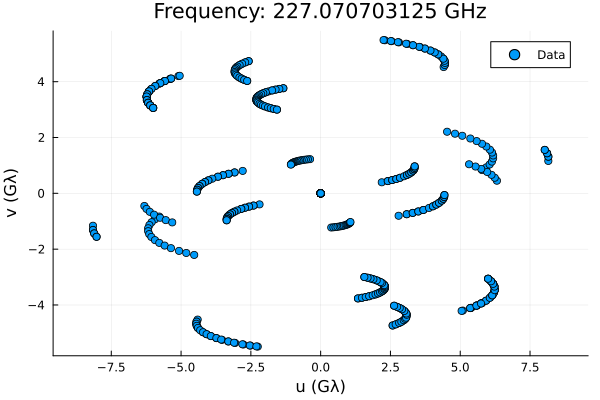

In [29]:
ac = arrayconfig(vis)
plot(ac)

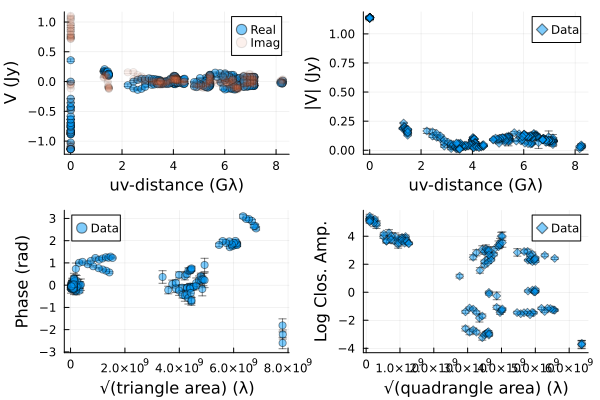

In [30]:
l = @layout [a b; c d]
pv = plot(vis)
pa = plot(amp)
pcp = plot(cphase)
plc = plot(lcamp)

plot(pv, pa, pcp, plc; layout=l)

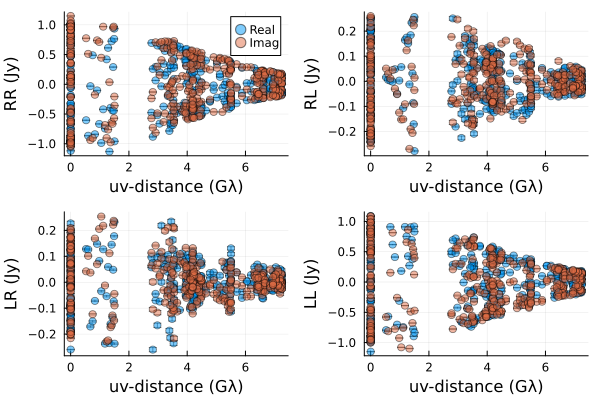

In [31]:
plot(coh)

## 2. Geometric Modeling of EHT Data

In [33]:
using Pyehtim
using StableRNGs

In [34]:
obs = load_uvfits_and_array("./comrade_data/SR1_M87_2017_096_lo_hops_netcal_StokesI.uvfits")

Python: <ehtim.obsdata.Obsdata object at 0x2c2bbfbb0>

In [35]:
obs = Pyehtim.scan_average(obs.flag_uvdist(uv_min = 0.1e9))

[ Info: Before homogenizing we have 25 unique times
[ Info: After homogenizing we have 25 unique times


Python: <ehtim.obsdata.Obsdata object at 0x2c0cfe890>

In [36]:
dlcamp, dcphase = extract_table(obs, 
                                LogClosureAmplitudes(;snrcut=3.0), 
                                ClosurePhases(;snrcut=3.0))

/Users/younghokim/.julia/environments/v1.9/.CondaPkg/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/younghokim/.julia/environments/v1.9/.CondaPkg/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/younghokim/.julia/environments/v1.9/.CondaPkg/env/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(EHTObservation{Float64,Comrade.EHTLogClosureAmplitudeDatum{Float64}, ...}
  source: M87
  mjd: 57849
  frequency: 2.27070703125e11
  bandwidth: 1.856e9
  stations: [:AA, :AP, :AZ, :JC, :LM, :PV, :SM]
  nsamples: 94
, EHTObservation{Float64,Comrade.EHTClosurePhaseDatum{Float64}, ...}
  source: M87
  mjd: 57849
  frequency: 2.27070703125e11
  bandwidth: 1.856e9
  stations: [:AA, :AP, :AZ, :JC, :LM, :PV, :SM]
  nsamples: 119
)

In [37]:
function model(θ)
    (;radius, width, ma, mp, τ, ξτ, f, σG, τG, ξG, xG, yG) = θ
    α = ma.*cos.(mp .- ξτ)
    β = ma.*sin.(mp .- ξτ)
    ring = f*smoothed(modify(MRing(α, β), Stretch(radius, radius*(1+τ)), Rotate(ξτ)), width)
    g = (1-f)*shifted(rotated(stretched(Gaussian(), σG, σG*(1+τG)), ξG), xG, yG)
    return ring + g
end

model (generic function with 1 method)

In [38]:
lklhd = RadioLikelihood(model, dlcamp, dcphase)

RadioLikelihood
	Number of data products: 2


In [41]:
using Distributions, VLBIImagePriors

[ Info: Precompiling VLBIImagePriors [b1ba175b-8447-452c-b961-7db2d6f7a029]
┌ Warning: Module Distributions with build ID fafbfcfd-0360-c8d0-0000-01bcfb667aa5 is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing VLBIImagePriors [b1ba175b-8447-452c-b961-7db2d6f7a029].


In [42]:
prior = NamedDist(
          radius = Uniform(μas2rad(10.0), μas2rad(30.0)),
          width = Uniform(μas2rad(1.0), μas2rad(10.0)),
          ma = (Uniform(0.0, 0.5), Uniform(0.0, 0.5)),
          mp = (Uniform(0, 2π), Uniform(0, 2π)),
          τ = Uniform(0.0, 1.0),
          ξτ= Uniform(0.0, π),
          f = Uniform(0.0, 1.0),
          σG = Uniform(μas2rad(1.0), μas2rad(100.0)),
          τG = Uniform(0.0, 1.0),
          ξG = Uniform(0.0, 1π),
          xG = Uniform(-μas2rad(80.0), μas2rad(80.0)),
          yG = Uniform(-μas2rad(80.0), μas2rad(80.0))
        )

NamedDist{(:radius, :width, :ma, :mp, :τ, :ξτ, :f, :σG, :τG, :ξG, :xG, :yG), Tuple{Uniform{Float64}, Uniform{Float64}, VLBIImagePriors.TupleDist{2, Tuple{Uniform{Float64}, Uniform{Float64}}}, VLBIImagePriors.TupleDist{2, Tuple{Uniform{Float64}, Uniform{Float64}}}, Vararg{Uniform{Float64}, 8}}}(
dists: (Uniform{Float64}(a=4.84813681109536e-11, b=1.454441043328608e-10), Uniform{Float64}(a=4.84813681109536e-12, b=4.84813681109536e-11), VLBIImagePriors.TupleDist{2, Tuple{Uniform{Float64}, Uniform{Float64}}}(dists=(Uniform{Float64}(a=0.0, b=0.5), Uniform{Float64}(a=0.0, b=0.5))), VLBIImagePriors.TupleDist{2, Tuple{Uniform{Float64}, Uniform{Float64}}}(dists=(Uniform{Float64}(a=0.0, b=6.283185307179586), Uniform{Float64}(a=0.0, b=6.283185307179586))), Uniform{Float64}(a=0.0, b=1.0), Uniform{Float64}(a=0.0, b=3.141592653589793), Uniform{Float64}(a=0.0, b=1.0), Uniform{Float64}(a=4.84813681109536e-12, b=4.84813681109536e-10), Uniform{Float64}(a=0.0, b=1.0), Uniform{Float64}(a=0.0, b=3.141592653

In [43]:
post = Posterior(lklhd, prior)

Posterior{RadioLikelihood{typeof(model), Nothing, Tuple{Comrade.EHTObservation{Float64, Comrade.EHTLogClosureAmplitudeDatum{Float64}, StructArrays.StructVector{Comrade.EHTLogClosureAmplitudeDatum{Float64}, NamedTuple{(:measurement, :error, :U1, :V1, :U2, :V2, :U3, :V3, :U4, :V4, :T, :F, :quadrangle), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{NTuple{4, Symbol}}}}, Int64}, Comrade.ClosureConfig{Comrade.EHTObservation{Float64, Comrade.EHTVisibilityDatum{Float64}, StructArrays.StructVector{Comrade.EHTVisibilityDatum{Float64}, NamedTuple{(:measurement, :error, :U, :V, :T, :F, :baseline), Tuple{Vector{ComplexF64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Tuple{Symbol, Symbol}}}}, Int64}, Comrade.EHTArrayConfiguration{Float64, TypedTables.Table{NamedTuple{(:sites, :X, :Y

In [44]:
logdensityof(post, (radius = μas2rad(20.0),
                  width = μas2rad(10.0),
                  ma = (0.3, 0.3),
                  mp = (π/2, π),
                  τ = 0.1,
                  ξτ= π/2,
                  f = 0.6,
                  σG = μas2rad(50.0),
                  τG = 0.1,
                  ξG = 0.5,
                  xG = 0.0,
                  yG = 0.0))

-7439.968456427528

## 2. 모델 재구조화

In [46]:
cpost = ascube(post)

Comrade.TransformedPosterior{Posterior{RadioLikelihood{typeof(model), Nothing, Tuple{Comrade.EHTObservation{Float64, Comrade.EHTLogClosureAmplitudeDatum{Float64}, StructArrays.StructVector{Comrade.EHTLogClosureAmplitudeDatum{Float64}, NamedTuple{(:measurement, :error, :U1, :V1, :U2, :V2, :U3, :V3, :U4, :V4, :T, :F, :quadrangle), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{NTuple{4, Symbol}}}}, Int64}, Comrade.ClosureConfig{Comrade.EHTObservation{Float64, Comrade.EHTVisibilityDatum{Float64}, StructArrays.StructVector{Comrade.EHTVisibilityDatum{Float64}, NamedTuple{(:measurement, :error, :U, :V, :T, :F, :baseline), Tuple{Vector{ComplexF64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Tuple{Symbol, Symbol}}}}, Int64}, Comrade.EHTArrayConfiguration{Float64, TypedTables.Tab

In [47]:
fpost = asflat(post)

Comrade.TransformedPosterior{Posterior{RadioLikelihood{typeof(model), Nothing, Tuple{Comrade.EHTObservation{Float64, Comrade.EHTLogClosureAmplitudeDatum{Float64}, StructArrays.StructVector{Comrade.EHTLogClosureAmplitudeDatum{Float64}, NamedTuple{(:measurement, :error, :U1, :V1, :U2, :V2, :U3, :V3, :U4, :V4, :T, :F, :quadrangle), Tuple{Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{NTuple{4, Symbol}}}}, Int64}, Comrade.ClosureConfig{Comrade.EHTObservation{Float64, Comrade.EHTVisibilityDatum{Float64}, StructArrays.StructVector{Comrade.EHTVisibilityDatum{Float64}, NamedTuple{(:measurement, :error, :U, :V, :T, :F, :baseline), Tuple{Vector{ComplexF64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Float64}, Vector{Tuple{Symbol, Symbol}}}}, Int64}, Comrade.EHTArrayConfiguration{Float64, TypedTables.Tab

In [50]:
logdensityof(cpost, rand(rng, dimension(cpost)))
logdensityof(fpost, randn(rng, dimension(fpost)))

-25329.634311799513

## 3. 최적 이미지 찾기

In [52]:
using ComradeOptimization
using OptimizationBBO

ndim = dimension(fpost)
f = OptimizationFunction(fpost)
prob = Optimization.OptimizationProblem(f, 
    randn(rng, ndim), 
    nothing, 
    lb=fill(-5.0, ndim), 
    ub=fill(5.0, ndim)
)

[ Info: Precompiling ComradeOptimization [26988f03-70df-4135-959e-06268cc6415a]
┌ Warning: Module Comrade with build ID fafbfcfd-ba48-2639-0000-01c5d4c11217 is missing from the cache.
│ This may mean Comrade [99d987ce-9a1e-4df8-bc0b-1ea019aa547b] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing ComradeOptimization [26988f03-70df-4135-959e-06268cc6415a].
[ Info: Precompiling QuasiMonteCarloDistributionsExt [decf30b5-e91f-5b94-86df-4be597853ae0]
┌ Warning: Module Distributions with build ID fafbfcfd-0360-c8d0-0000-01bcfb667aa5 is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing QuasiMonteCarloDistributionsExt [decf30b5-e91f-5b94-86df-4be597853ae0].
[ Info: Precompi

OptimizationProblem. In-place: true
u0: 14-element Vector{Float64}:
 -2.042002086038424
 -0.7870208631180695
  0.5905224676986801
  0.6421092391624518
  0.45523702486217854
  0.05420311090968867
  0.2884763107619252
  0.5868282026416113
 -1.6942586185480404
 -0.6959809938112977
 -0.30096086778202435
  2.1005530576443556
 -0.6896446526429071
 -0.7299727780343646

In [53]:
sol = solve(prob, BBO_adaptive_de_rand_1_bin_radiuslimited(); maxiters = 50_000);

In [59]:
xopt = transform(fpost, sol)

(radius = 9.303071067355888e-11, width = 1.6104311383417425e-11, ma = (0.20309138782193054, 0.052185269875439894), mp = (2.4578801228902103, 1.0508292716328451), τ = 0.15414283142034335, ξτ = 1.7912756581662768, f = 0.6559909036501435, σG = 7.540230624964125e-11, τG = 0.8797500585336232, ξG = 0.8481071499718609, xG = -1.9940267856226197e-10, yG = -2.024654864107137e-10)

In [57]:
import WGLMakie as CM

[ Info: Precompiling WGLMakie [276b4fcb-3e11-5398-bf8b-a0c2d153d008]
┌ Warning: Module HTTP with build ID fafbfcfd-2ab5-75ec-0000-019b362bdc92 is missing from the cache.
│ This may mean HTTP [cd3eb016-35fb-5094-929b-558a96fad6f3] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing WGLMakie [276b4fcb-3e11-5398-bf8b-a0c2d153d008].
[ Info: Precompiling JSServe [824d6782-a2ef-11e9-3a09-e5662e0c26f9]
┌ Warning: Module HTTP with build ID fafbfcfd-2ab5-75ec-0000-019b362bdc92 is missing from the cache.
│ This may mean HTTP [cd3eb016-35fb-5094-929b-558a96fad6f3] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing JSServe [824d6782-a2ef-11e9-3a09-e5662e0c26f9].
[ Info: Precompiling Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a]
┌ Warning: Module StaticArrays with build ID

In [64]:
CM.inline!(true)

LoadError: UndefVarError: `inline!` not defined

In [60]:
import WGLMakie as CM
g = imagepixels(μas2rad(200.0), μas2rad(200.0), 256, 256)
fig, ax, plt = CM.image(g, model(xopt); 
        axis=(xreversed=true, 
                aspect=1, 
                xlabel="RA (μas)", 
                ylabel="Dec (μas)"), 
        figure=(;resolution=(650,500),) ,
        colormap=:afmhot)

In [66]:
typeof(fig)

Makie.Figure

In [67]:
using CairoMakie

[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
┌ Warning: Module Makie with build ID ffffffff-ffff-ffff-0000-099f693e0e0b is missing from the cache.
│ This may mean Makie [ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0].
[ Info: Precompiling Cairo [159f3aea-2a34-519c-b102-8c37f9878175]
┌ Warning: Module Cairo_jll with build ID fafbfcfd-d2bf-0a92-0000-03eab55bd820 is missing from the cache.
│ This may mean Cairo_jll [83423d85-b0ee-5818-9007-b63ccbeb887a] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing Cairo [159f3aea-2a34-519c-b102-8c37f9878175].
[ Info: Precompiling Pango_jll [36c8627f-9965-5494-a995-c6b170f724f3]
┌ Warning: Module Cairo_jll 

In [68]:
CairoMakie.activate!()

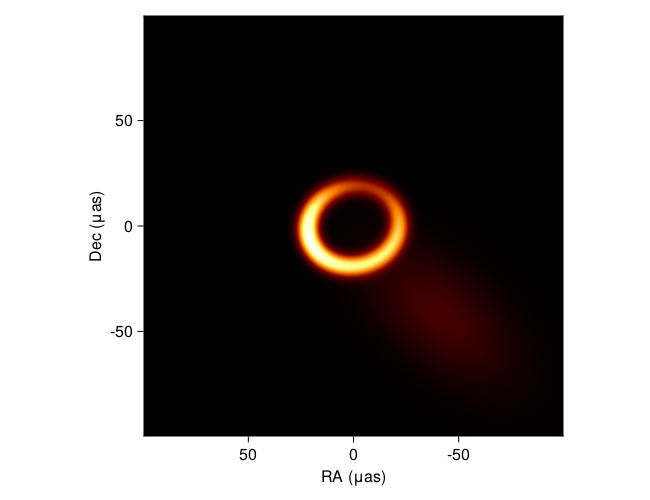

In [69]:
fig

In [76]:
save("comrade_opt_plot2.png", fig)

CairoMakie.Screen{IMAGE}


## 3. 재구조화의 불확실성 정량화

- 최적의 이미지를 찾는 것은 종종 도움이 되지만, 과학에서 가장 중요한 것은 추론의 확실성을 정량화 하는 것

- 이것이 Comrade의 목표

- 베이지안 통계의 언어로, 우리는 우리가 선택한 모델과 데이터가 주어졌을 때 가능한 이미지 재구성의 후방에 대한 표현을 찾고자 함

> Comrade는 여러 가지 샘플링 및 기타 사후 근사화 도구를 제공함
> 
> 목록을 보려면 문서의 라이브러리 섹션을 참조
>
> Posterior에 대한 전역 탐색을 가능하게 하는 최신의 병렬 템퍼링 샘플러인 Pigeons.jl을 사용
>
> 차원이 작은 문제(100개 미만)이 경우, 특히 1개 이상의 스레드/코어에 엑세스할 수 있는 경우 이 샘플러를 사용하는 것이 좋음


이 문장은 Julia의 Comrade 패키지에 대한 소개와 함께 특정한 샘플링 방법인 "tempering sampler"에 대해 언급하고 있습니다. 각 부분을 분석해보면:

1. Comrade provides several sampling and other posterior approximation tools.: 이 부분은 Comrade가 다양한 샘플링 방법과 후방 근사(posterior approximation) 도구를 제공한다고 설명합니다. 여기서 '샘플링'은 통계적 추론에서 확률 분포로부터 샘플을 추출하는 과정을 말하고, '후방 근사'는 주어진 데이터에 대한 모델의 파라미터 분포를 근사하는 방법을 의미합니다.

2. To see the list, please see the Libraries section of the docs.: 이 부분은 Comrade 패키지의 문서 내 'Libraries' 섹션을 참조하여 제공되는 샘플링 방법과 도구들의 목록을 확인하라고 안내합니다.

3. For this example, we will be using Pigeons.jl which is a state-of-the-art parallel tempering sampler that enables global exploration of the posterior.: 이 문장은 특정한 예제에서 사용될 샘플링 도구인 Pigeons.jl을 소개합니다. Pigeons.jl은 최신의 병렬 tempering 샘플러라고 설명하며, 이는 후방 분포의 전역 탐색(global exploration)을 가능하게 하는 도구입니다.

4. For smaller dimension problems (< 100) we recommend using this sampler especially if you have access to > 1 thread/core.: 이 부분은 차원이 작은 문제(100개 미만의 파라미터)에 대해 Pigeons.jl을 사용할 것을 권장하며, 특히 멀티 스레드/코어 환경에서 더 효과적임을 언급합니다.

이제 "tempering sampler"가 무엇인지에 대해 설명하겠습니다:

**Tempering Sampler:** Tempering 샘플링은 Markov Chain Monte Carlo (MCMC) 방법의 일종으로, 후방 분포의 여러 지역을 탐색하는 데 특히 유용한 기법입니다. 이 방법은 후방 분포의 '온도'를 조정하여, 샘플러가 높은 확률 밀도 지역뿐만 아니라 낮은 확률 밀도 지역도 탐색할 수 있도록 합니다. 이는 특히 복잡한 혹은 다중 모드(multi-modal) 분포를 가진 문제에서 전역 최적화(global optimization)를 찾는 데 도움을 줄 수 있습니다. '병렬 tempering'은 여러 개의 체인을 동시에 실행하며, 각각 다른 온도 설정으로 샘플링을 진행합니다. 이렇게 함으로써, 전체 파라미터 공간을 더 효율적으로 탐색할 수 있습니다.

In [78]:
using Pigeons

[ Info: Precompiling Pigeons [0eb8d820-af6a-4919-95ae-11206f830c31]
┌ Warning: Module SortingAlgorithms with build ID fafbfcfd-e49d-ce49-0000-030945c00d73 is missing from the cache.
│ This may mean SortingAlgorithms [a2af1166-a08f-5f64-846c-94a0d3cef48c] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing Pigeons [0eb8d820-af6a-4919-95ae-11206f830c31].
[ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
┌ Warning: Module SortingAlgorithms with build ID fafbfcfd-e49d-ce49-0000-030945c00d73 is missing from the cache.
│ This may mean SortingAlgorithms [a2af1166-a08f-5f64-846c-94a0d3cef48c] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1793
[ Info: Skipping precompilation since __precompile__(false). Importing DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0].
[ Info: Precompiling InlineStrings [842dd82b-1e85-43dc

In [79]:
pt = pigeons(target=cpost, 
             explorer=SliceSampler(), 
             record = [traces, round_trip, log_sum_ratio], 
             n_chains=10, 
             n_rounds=7)
chain = sample_array(cpost, pt)

───────────────────────────────────────────────────────────────────────────────────────
  scans     restarts      Λ      log(Z₁/Z₀)   min(α)     mean(α)    min(αₑ)   mean(αₑ) 
────────── ────────── ────────── ────────── ────────── ────────── ────────── ──────────
        2          0          3  -3.37e+03          0      0.667          1          1 
        4          0          4       -469   2.07e-10      0.556          1          1 
        8          0       7.12      -40.4   1.41e-23      0.209          1          1 
       16          0       6.54       52.2   2.73e-07      0.273          1          1 
       32          0       6.77       78.8   0.000316      0.248          1          1 
       64          0        7.4       77.8     0.0506      0.178          1          1 
      128          0       7.53       77.8     0.0826      0.164          1          1 
───────────────────────────────────────────────────────────────────────────────────────


Table with 12 columns and 128 rows:
      radius       width        ma                    mp                  ⋯
    ┌──────────────────────────────────────────────────────────────────────
 1  │ 9.85844e-11  1.99719e-11  (0.294288, 0.102343)  (2.46381, 3.41703)  ⋯
 2  │ 9.93358e-11  1.93611e-11  (0.291812, 0.077455…  (2.48309, 3.49087)  ⋯
 3  │ 9.90266e-11  1.62811e-11  (0.290227, 0.078725…  (2.52348, 3.51076)  ⋯
 4  │ 9.97864e-11  1.65018e-11  (0.29136, 0.0761957)  (2.51433, 3.36906)  ⋯
 5  │ 9.978e-11    1.61674e-11  (0.285602, 0.072289…  (2.49785, 3.42046)  ⋯
 6  │ 9.95215e-11  1.78486e-11  (0.285989, 0.074667…  (2.49291, 3.36024)  ⋯
 7  │ 9.98613e-11  1.74579e-11  (0.302125, 0.076758…  (2.49769, 3.3519)   ⋯
 8  │ 9.97418e-11  1.86417e-11  (0.297174, 0.082504…  (2.49784, 3.30468)  ⋯
 9  │ 9.94439e-11  1.56836e-11  (0.295358, 0.080405…  (2.48816, 3.41441)  ⋯
 10 │ 9.99924e-11  1.84843e-11  (0.296364, 0.079442…  (2.51914, 3.37925)  ⋯
 11 │ 9.91224e-11  1.84749e-11  (0.300167, 0.077564…

### 시각적 적합 진단 simple visual fit diagnostics 

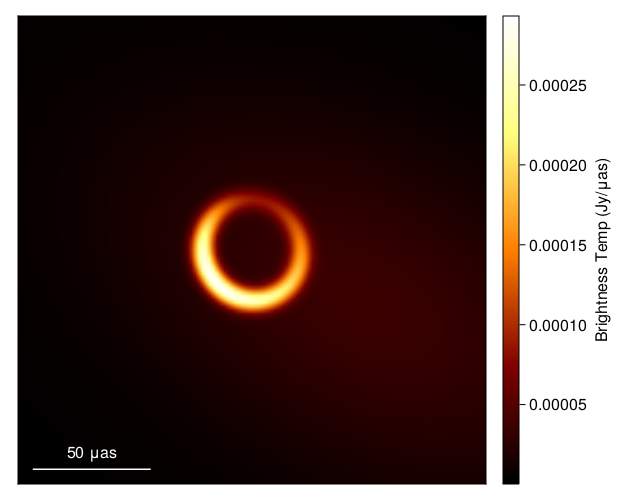

In [80]:
imgs = intensitymap.(skymodel.(Ref(post), sample(chain, 100)), μas2rad(200.0), μas2rad(200.0), 128, 128)
imageviz(imgs[end], colormap=:afmhot)

In [82]:
output_view = imageviz(imgs[end], colormap=:afmhot)
save("comrade_result_1.png", output_view)

CairoMakie.Screen{IMAGE}


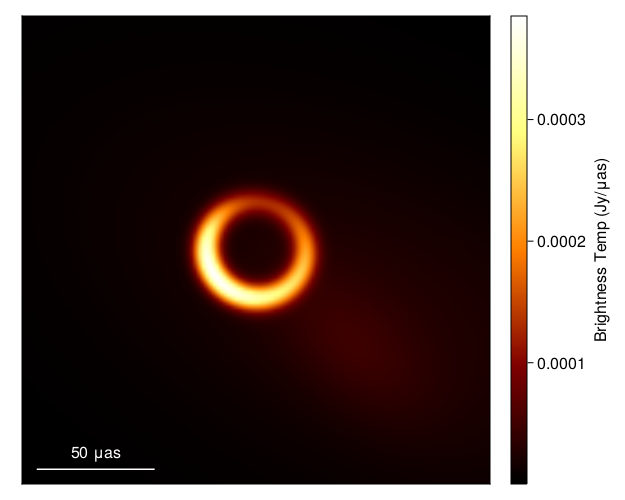

In [83]:
meanimg = mean(imgs)
imageviz(meanimg, colormap=:afmhot)

In [84]:
output_view2 = imageviz(meanimg, colormap=:afmhot)
save("comrade_result_2.png", output_view2)

CairoMakie.Screen{IMAGE}


- We can also plot random draws from the posterior predictive distribution. 

- The `posterior predictive distribution` create a number of synthetic observations that are marginalized over the posterior.

- posterior 분포 예측을 통해 posterior 값으로 나타나지 않은 관측치에 대해서도 생성이 가능함

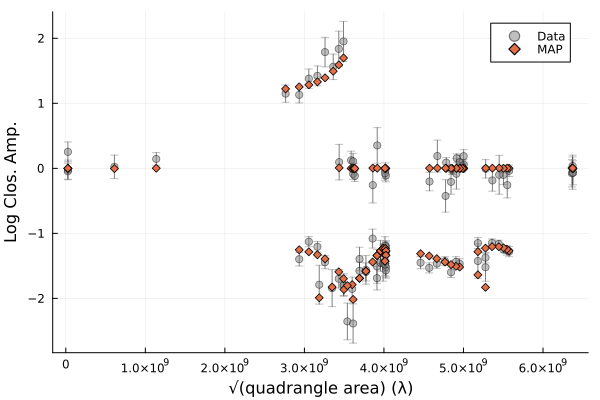

In [85]:
using Plots
plot(model(xopt), dlcamp, label="MAP")

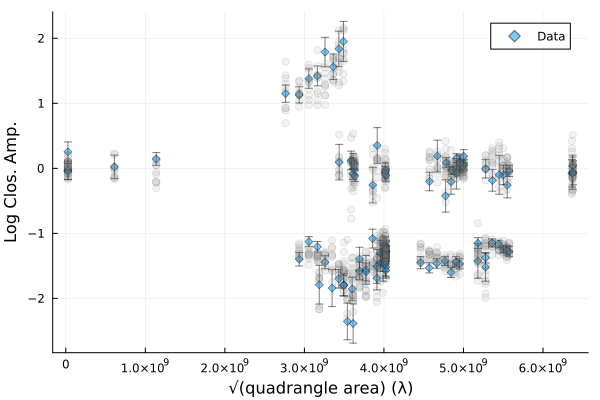

In [87]:
p = plot(dlcamp);
uva = [sqrt.(uvarea(dlcamp[i])) for i in 1:length(dlcamp)]
for i in 1:10
    m = simulate_observation(post, sample(chain, 1)[1])[1]
    Plots.scatter!(uva, m, color=:grey, label=:none, alpha=0.1)
end
p

마지막으로, 모든 것을 공통 척도로 놓고 정규화된 잔차를 그릴 수도 있습니다. 정규화된 잔차는 데이터와 모델 간의 차이를 데이터의 오차로 나눈 값입니다:

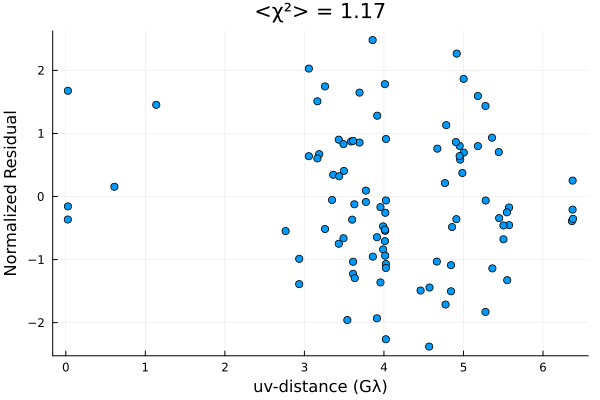

In [88]:
residual(model(xopt), dlcamp)

모든 진단 플롯은 모델에 일부 배출원이 누락되었음을 시사합니다. 사실 이 모델은 데이터를 설명하기에는 너무 단순합니다. 더 나은 적합성을 얻기 위해 모델에 추가해야 할 기능에 대한 몇 가지 아이디어를 얻으려면 EHTC VI 2019를 확인하세요!

https://iopscience.iop.org/article/10.3847/2041-8213/ab1141